1/Получите и загрузите данные

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2/ Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df = df[~df['Age'].isnull()]
df = df[~df['Cabin'].isnull()]
df = df[~df['Embarked'].isnull()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

X = df[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']


reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(df[['Pclass','Age', 'SibSp', 'Parch', 'Fare']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.07150109 -0.00870164  0.03556363 -0.06651303  0.00068105]
Bias: 1.029248545100191
Error: 0.3994803531443824


3/ Снова загрузите полные данные.

In [57]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


4/ Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
Обоснование: порядковый номер пассажира, полное имя, серия и номер билета, стоимость билета, номер каюты и место посадки не влияют на способность выжить при кораблекрушении. 

In [58]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


5/ Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [60]:
perc_null = 100 - len(df[~df['Age'].isnull()])/len(df)*100
perc_null

19.86531986531986

In [61]:
df.describe()

,Pclass,Age,SibSp,Parch,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,0.383838
std,0.836071,14.526497,1.102743,0.806057,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [62]:
round(df['Age'].mean())

30

In [63]:
import numpy as np
df['Age_Modified'] = np.where(df['Age'].isnull(), round(df['Age'].mean()), df['Age'])

C:\Users\79653\AppData\Local\Temp/ipykernel_18448/2774168038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Modified'] = np.where(df['Age'].isnull(), round(df['Age'].mean()), df['Age'])


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    int64  
 1   Sex           891 non-null    object 
 2   Age           714 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Survived      891 non-null    int64  
 6   Age_Modified  891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


6/ Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [65]:
df['Sex_Flag'] = df['Sex'].map({'female':0, 'male':1}).astype(int)

C:\Users\79653\AppData\Local\Temp/ipykernel_18448/3272759782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex_Flag'] = df['Sex'].map({'female':0, 'male':1}).astype(int)


In [70]:
df = df[['Pclass', 'SibSp', 'Parch', 'Age_Modified', 'Sex_Flag', 'Survived']]

In [71]:
df

,Pclass,SibSp,Parch,Age_Modified,Sex_Flag,Survived
0,3,1,0,22.0,1,0
1,1,1,0,38.0,0,1
2,3,0,0,26.0,0,1
3,1,1,0,35.0,0,1
4,3,0,0,35.0,1,0
...,...,...,...,...,...,...
886,2,0,0,27.0,1,0
887,1,0,0,19.0,0,1
888,3,1,2,30.0,0,0
889,1,0,0,26.0,1,1


7/ Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8/*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9/*Попробуйте математически преобразовать признак Age.

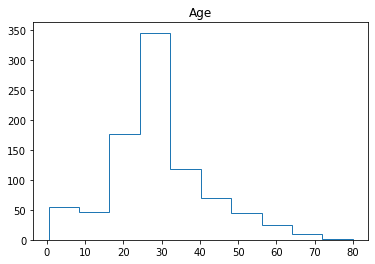

In [101]:
import matplotlib.pyplot as plt
counts, bins = np.histogram(df['Age_Modified'])
plt.stairs(counts, bins)
plt.title('Age')
plt.show()

<AxesSubplot:>

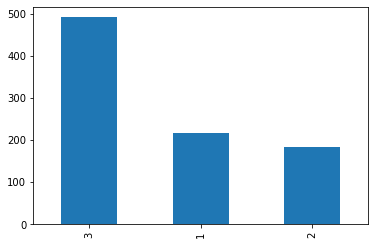

In [95]:
df['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

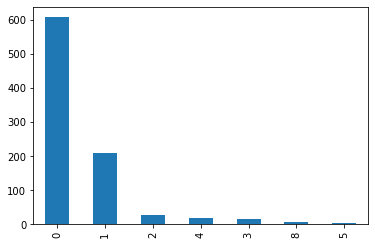

In [96]:
df['SibSp'].value_counts().plot(kind='bar')

<AxesSubplot:>

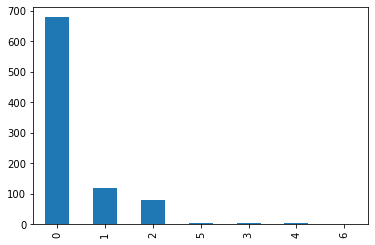

In [100]:
df['Parch'].value_counts().plot(kind='bar')

<AxesSubplot:>

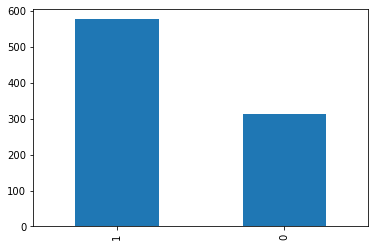

In [98]:
df['Sex_Flag'].value_counts().plot(kind='bar')

Исходя из визуального анализа распределения данных, можно сделать вывод, что выбросы отсутствуют.
Присутствует дисбаланс для SibSp, Parch
Age_Modified можно разбить на группы возрастов, например от 0 до 18 (1), от 19 до 35 (2), от 36 до 60 (3), 60+ (4)

10/ Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

X = df[['Pclass','Age_Modified', 'SibSp', 'Parch', 'Sex_Flag']]
y = df['Survived']


reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(df[['Pclass','Age_Modified', 'SibSp', 'Parch', 'Sex_Flag']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.18381362 -0.00592702 -0.04092951 -0.01612775 -0.51457296]
Bias: 1.3453712465228609
Error: 0.2925983941151383


11/ Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Заменили пропуски на среднее значение признака, так как удаляя пропуски терялся достаточно большой объем данных для обучения.
Заменили категориальный признак для возможности его добавления в модель

Было:
Weights: [-0.07150109 -0.00870164  0.03556363 -0.06651303  0.00068105]
Bias: 1.029248545100191
Error: 0.3994803531443824

Стало:
Weights: [-0.18381362 -0.00592702 -0.04092951 -0.01612775 -0.51457296]
Bias: 1.3453712465228609
Error: 0.2925983941151383

Величина средней абсолютной ошибки уменьшилась после преобразований.
На больших данных возможно целесообразно заменять пропущенные значения отдельным классом (Unknown)